In [1]:
import numpy as np

from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline

from Classifiers import *

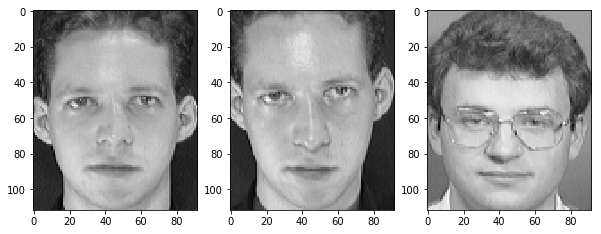

In [146]:
image1 = io.imread("data/att/s1/1.pgm")
image2 = io.imread("data/att/s1/3.pgm")
image3 = io.imread("data/att/s6/4.pgm")

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3, 1)
plt.imshow(image1, cmap="gray")
fig.add_subplot(1,3, 2)
plt.imshow(image2, cmap="gray")
fig.add_subplot(1,3, 3)
plt.imshow(image3, cmap="gray")
plt.show()

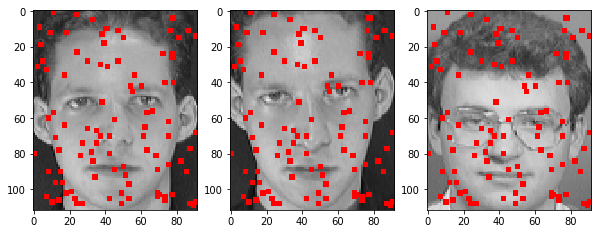

In [317]:
from skimage import draw

rp_clf = RandomPointsClassifier(n_points=100)

image1_rgb = np.stack((image1,)*3, axis=-1)
image2_rgb = np.stack((image2,)*3, axis=-1)
image3_rgb = np.stack((image3,)*3, axis=-1)

for point in rp_clf.points:
    rr,cc = draw.circle(*point, 2)
    draw.set_color(image1_rgb, (rr, cc), (255,0,0))
    draw.set_color(image2_rgb, (rr, cc), (255,0,0))
    draw.set_color(image3_rgb, (rr, cc), (255,0,0))
    
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,3, 1)
plt.imshow(image1_rgb, cmap="gray")
fig.add_subplot(1,3, 2)
plt.imshow(image2_rgb, cmap="gray")
fig.add_subplot(1,3, 3)
plt.imshow(image3_rgb, cmap="gray")
plt.show()

In [173]:
print(rp_clf.Distance(image1,image2), clf.Distance(image1,image3))

1676.9710790589086 1720.782089632502
0.9999310188550172 0.9999127427722623


In [170]:
scale_clf = ScaleClassifier()
print(scale_clf.Distance(image1,image2), scale_clf.Distance(image1,image3))
print(scale_clf.Compare(image1,image2), scale_clf.Compare(image1,image3))

4.894269761823671 7.93735309423904
0.02889916471846876 0.07280025180278737


In [225]:
dct_clf = DCTClassifier()
print(dct_clf.Distance(image1,image2), dct_clf.Distance(image1,image3))

3015.5127481024333 5343.061177935257


In [256]:
dft_clf = DFTClassifier(clipped=False)
print(dft_clf.Distance(image1,image2), dft_clf.Distance(image1,image3))

1817.578354835592 1813.2997670730144


In [273]:
hist_clf = HistogramClassifier()
print(hist_clf.Distance(image1,image2), hist_clf.Distance(image1,image3))

601.0174706279344 2912.8515238508126


In [305]:
grad_clf = GradientClassifier()
print(grad_clf.Distance(image1,image2), grad_clf.Distance(image1,image3))

0.8060897463001703 1.7104441230506369


In [319]:
def classify(clf, img, classes):
    distances = np.array(list(map(lambda img2: clf.Distance(img, img2), classes)))
    distances = distances / np.sum(distances)
    
    return distances.argmin()


print("Random points -- ",  classify(rp_clf, image1, [image2, image3])==0)
print("Scales -- ",  classify(scale_clf, image1, [image2, image3])==0)
print("DCT -- ",  classify(dct_clf, image1, [image2, image3])==0)
print("DFT -- ",  classify(dft_clf, image1, [image2, image3])==0)
print("Histogram -- ",  classify(hist_clf, image1, [image2, image3])==0)
print("Gradient -- ",  classify(grad_clf, image1, [image2, image3])==0)

Random points --  True
Scales --  True
DCT --  True
DFT --  False
Histogram --  True
Gradient --  True


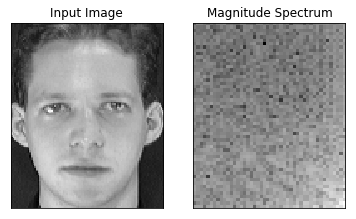

In [261]:
img = cv2.imread('./data/att/s1/1.pgm', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum = magnitude_spectrum[:magnitude_spectrum.shape[0]//2, :magnitude_spectrum.shape[1]//2]

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

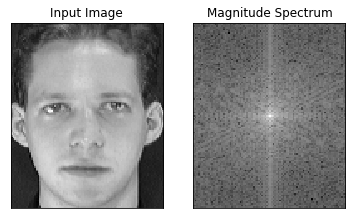

In [258]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

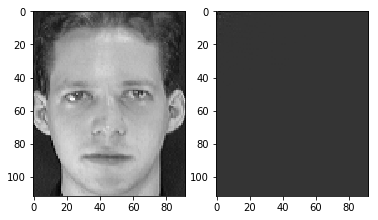

In [215]:
from scipy.fftpack import dct, idct

dct = dct(dct(img.T, norm='ortho').T, norm='ortho')

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.subplot(122),plt.imshow(dct, cmap = 'gray')
plt.show()

In [217]:
dct_size = img.shape[0]
reconstructed_images = []

for ii in range(dct_size):
    dct_copy = dct.copy()
    dct_copy[ii:,:] = 0
    dct_copy[:,ii:] = 0
    
    # Reconstructed image
    r_img = idct(idct(dct_copy.T, norm='ortho').T, norm='ortho')
    r_img = r_img.clip(0, 255).astype('uint8')

    # Create a list of images
    reconstructed_images.append(r_img);

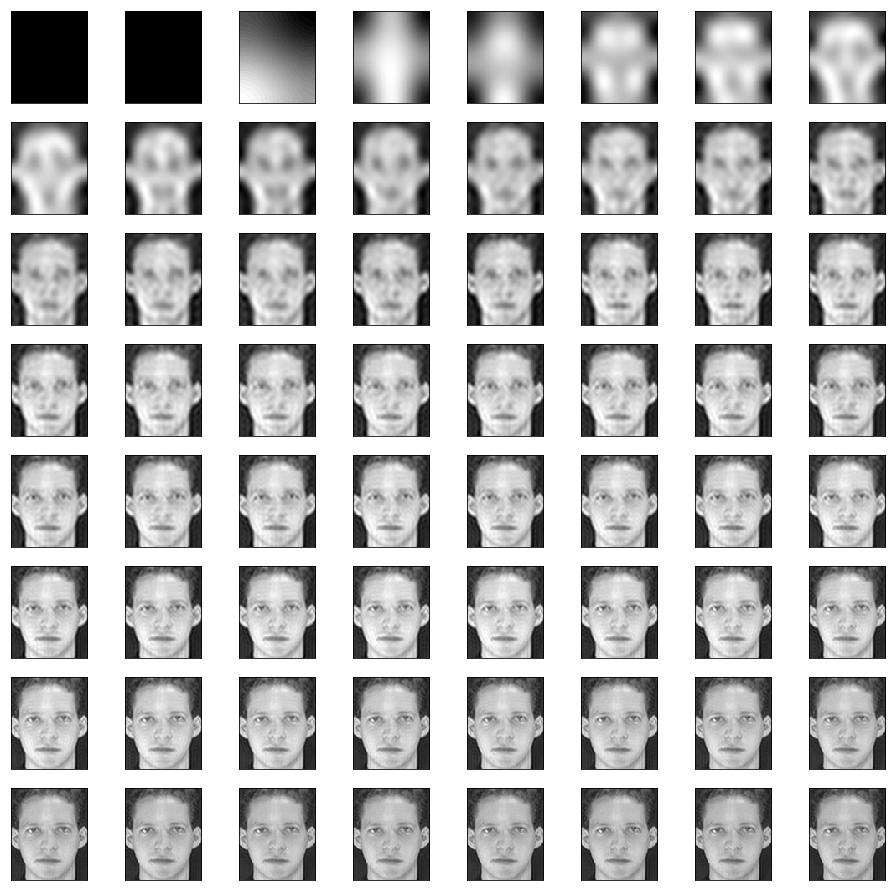

In [218]:
fig = plt.figure(figsize=(16, 16))
for ii in range(64):
    plt.subplot(8, 8, ii + 1)
    plt.imshow(reconstructed_images[ii], cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);